In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

0
(60000, 28, 28)


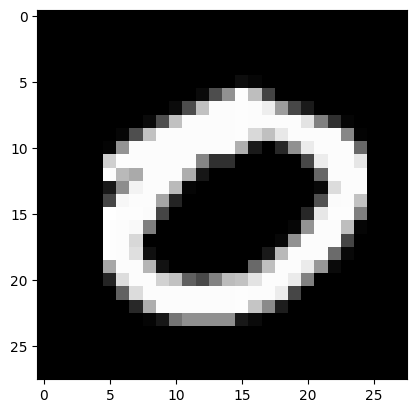

In [8]:
# 数据加载以及处理

(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()
trainX, testX = trainX / 255, testX / 255    # map the value of images into [0, 1]

plt.imshow(trainX[114], cmap = 'gray')
print(trainY[114])

print(trainX.shape)

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(),

    keras.layers.Dense(128),

    keras.layers.LeakyReLU(),

    keras.layers.Dropout(0.3),

    keras.layers.Dense(64),

    keras.layers.LeakyReLU(),

    keras.layers.Dropout(0.3),

    keras.layers.Dense(32),

    keras.layers.Dense(10, activation = 'softmax')
])

In [5]:
model.compile(optimizer = keras.optimizers.Adam(0.03), loss = keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(trainX, trainY, batch_size = 64, epochs = 5)

Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 3.9644 - accuracy: 0.7498
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4710 - accuracy: 0.8735
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4872 - accuracy: 0.8722
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 37.2697 - accuracy: 0.7850
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 1.2746 - accuracy: 0.8323


In [6]:
from pandas import DataFrame

model.save('../SavedModel/MNIST/BPModel1.h5')

acc = np.array(history.history['accuracy'])
los = np.array(history.history['loss'])

df = DataFrame(data = {'loss' : los, 'accuracy' : acc})
df.to_csv('../SavedModel/MNIST/BPLoss1.csv', index = False)

e:\Python\Python3.10\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


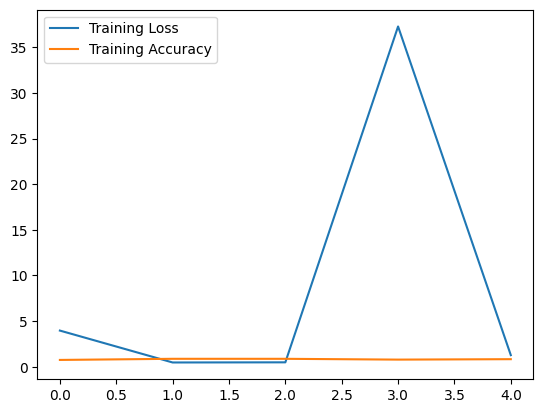

In [7]:
# 绘制 Loss 图像
plt.plot(los, label = 'Training Loss')
plt.plot(acc, label = 'Training Accuracy')
plt.legend()
plt.show()